In [132]:
#solution for task 1

# Importing the data

In [133]:
import pandas as pd                        #importing pandas for reading data
import numpy as np                         #importing numpy for numerical calculations
import matplotlib.pyplot as plt            #importing for plotting graphs
%matplotlib inline

In [134]:
url = "http://bit.ly/w-data"               #the url containing data
df = pd.read_csv(url)                      #reading the data as csv file using pandas

# Exploring the data

In [135]:
df.head(5)                                 #printing the first 5 rows of data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [136]:
df.tail(5)                                 #printing the last 5 rows of data

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [137]:
df.shape                                   #printing the number of rows and columns of data

(25, 2)

In [138]:
#we can infer from the result that the given data contains 25 rows and 2 columns

In [139]:
df.describe()                              #printing the descriptive statistics of data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [140]:
df.info()                                 #printing the types of values present in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [141]:
df.isnull().sum()                         #checking for null values 

Hours     0
Scores    0
dtype: int64

# Visualising the data

<Figure size 3250x3900 with 0 Axes>

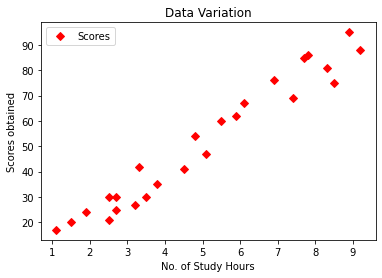

In [142]:
plt.figure(dpi=130, figsize=(25,30))
df.plot(x='Hours', y='Scores', style='D', color='red')  
plt.title('Data Variation')  
plt.xlabel('No. of Study Hours')  
plt.ylabel('Scores obtained')  
plt.show()

In [143]:
#we can infer a linear relationship between the number of hours studied and percentage of marks obtained

# Implementing Linear Regression

In [144]:
x = df.iloc[ : , :-1]                       #dividing the independent and dependent variables in the data
y = df.iloc[ : , 1]

In [145]:
x.head(10),y.head(10)                       #checking the divided data sets

(   Hours
 0    2.5
 1    5.1
 2    3.2
 3    8.5
 4    3.5
 5    1.5
 6    9.2
 7    5.5
 8    8.3
 9    2.7,
 0    21
 1    47
 2    27
 3    75
 4    30
 5    20
 6    88
 7    60
 8    81
 9    25
 Name: Scores, dtype: int64)

In [146]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

From the sklearn library we import the required package and split the data into training and test in the ratio 7 : 3

In [147]:
from sklearn.linear_model import LinearRegression  
LR = LinearRegression()  
LR.fit(x_train, y_train) 

LinearRegression()

We have successfully trained the data with the linear regression model

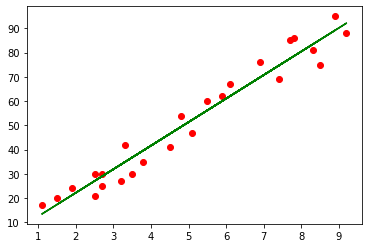

In [148]:
lrline = LR.coef_*x+LR.intercept_           #obtaining the values of parameters (intercept and slope) and plotting them
plt.scatter(x, y, color='red')                             
plt.plot(x, lrline, color='green');
plt.show()

# Making predictions

In [149]:
print(x_test)
y_pred = LR.predict(x_test)                                       # Predicting the test values

    Hours
8     8.3
16    2.5
0     2.5
23    6.9
11    5.9
9     2.7
13    3.3
1     5.1


In [150]:
dfr = pd.DataFrame({'Original': y_test, 'Predicted': y_pred})    #making a data set with actual and predicted values
dfr 

,Original,Predicted
8,81,83.391686
16,30,27.070549
0,21,27.070549
23,76,69.796929
11,62,60.086388
9,25,29.012657
13,42,34.838982
1,47,52.317955


In [151]:
result=LR.coef_*9.25+LR.intercept_
result

array([92.61670034])

Our model predicted that if the student studoes for 9.25 hours then score obtained will be 92.61670034

# Testing accuracy of model

In [152]:
from sklearn.metrics import mean_absolute_error 
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.499999999999998


In [153]:
from sklearn.metrics import mean_squared_error  
print('Mean Square Error:', mean_squared_error (y_test, y_pred))

Mean Square Error: 23.61945761415174


In [154]:
from sklearn.metrics import mean_squared_error    
print('Root Mean Square Error:', mean_squared_error (y_test, y_pred)**0.5)

Root Mean Square Error: 4.859985351228103
